In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
titanic_data = pd.read_csv('data/train.csv')

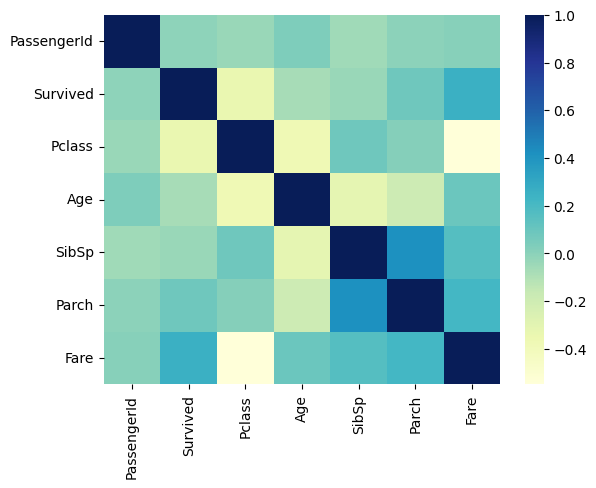

In [4]:
import seaborn as sns

sns.heatmap(titanic_data.corr(), cmap="YlGnBu")
plt.show()

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived", "Pclass", "Sex"]]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]

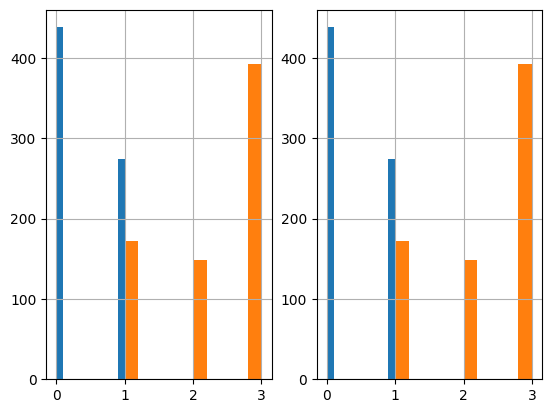

In [10]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.show()

In [11]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 132 to 855
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          578 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        160 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [13]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        imputer = SimpleImputer(strategy="mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

In [21]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        
        column_names = ["C", "S", "Q", "N"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        
        column_names = ["Females", "Male"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
            
        return X           

In [22]:
class FeatureDropper (BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis=1, errors="ignore")

In [23]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer", AgeImputer()),
                     ("featureencoder", FeatureEncoder()),
                     ("featuredropper", FeatureDropper())])

In [24]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [25]:
strat_train_set

PassengerId  Survived  Pclass       Age  SibSp  Parch      Fare    C  \
132          133         0       3  47.00000      1      0   14.5000  0.0   
10            11         1       3   4.00000      1      1   16.7000  0.0   
96            97         0       1  71.00000      0      0   34.6542  1.0   
638          639         0       3  41.00000      0      5   39.6875  0.0   
363          364         0       3  35.00000      0      0    7.0500  0.0   
..           ...       ...     ...       ...    ...    ...       ...  ...   
397          398         0       2  46.00000      0      0   26.0000  0.0   
547          548         1       2  29.38481      0      0   13.8625  1.0   
509          510         1       3  26.00000      0      0   56.4958  0.0   
609          610         1       1  40.00000      0      0  153.4625  0.0   
855          856         1       3  18.00000      0      1    9.3500  0.0   

       S    Q  Females  Male  
132  0.0  1.0      1.0   0.0  
10   0.0  1.0      1.0   0.0  
96   0.0  0.0      0.0   1.0  
638  0.0  1.0      1.0   0.0  
363  0.0  1.0      0.0   1.0  
..   ...  ...      ...   ...  
397  0.0  1.0      0.0   1.0  
547  0.0  0.0      0.0   1.0  
509  0.0  1.0      0.0   1.0  
609  0.0  1.0      1.0   0.0  
855  0.0  1.0      1.0   0.0  

[712 rows x 12 columns]

In [26]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 132 to 855
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Females      712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [29]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(['Survived'], axis=1)
y = strat_train_set['Survived']

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_gird = [
    {"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}
]

grid_search = GridSearchCV(clf, param_gird, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [31]:
final_clf= grid_search.best_estimator_

In [32]:
final_clf

RandomForestClassifier(max_depth=5, n_estimators=500)

In [33]:
strat_test_set = pipeline.fit_transform(strat_test_set)

In [36]:
X_test = strat_test_set.drop(['Survived'], axis=1)
y_test = strat_test_set['Survived']

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

In [37]:
final_clf.score(X_data_test, y_data_test)

0.7877094972067039

In [38]:
final_data = pipeline.fit_transform(titanic_data)

In [39]:
final_data

PassengerId  Survived  Pclass        Age  SibSp  Parch     Fare    C  \
0              1         0       3  22.000000      1      0   7.2500  0.0   
1              2         1       1  38.000000      1      0  71.2833  1.0   
2              3         1       3  26.000000      0      0   7.9250  0.0   
3              4         1       1  35.000000      1      0  53.1000  0.0   
4              5         0       3  35.000000      0      0   8.0500  0.0   
..           ...       ...     ...        ...    ...    ...      ...  ...   
886          887         0       2  27.000000      0      0  13.0000  0.0   
887          888         1       1  19.000000      0      0  30.0000  0.0   
888          889         0       3  29.699118      1      2  23.4500  0.0   
889          890         1       1  26.000000      0      0  30.0000  1.0   
890          891         0       3  32.000000      0      0   7.7500  0.0   

       S    Q  Females  Male  
0    0.0  1.0      0.0   1.0  
1    0.0  0.0      1.0   0.0  
2    0.0  1.0      1.0   0.0  
3    0.0  1.0      1.0   0.0  
4    0.0  1.0      0.0   1.0  
..   ...  ...      ...   ...  
886  0.0  1.0      0.0   1.0  
887  0.0  1.0      1.0   0.0  
888  0.0  1.0      1.0   0.0  
889  0.0  0.0      0.0   1.0  
890  1.0  0.0      0.0   1.0  

[891 rows x 12 columns]

In [40]:
X_final = final_data.drop(['Survived'], axis=1)
y_final = final_data['Survived']

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy()

In [41]:
prod_clf = RandomForestClassifier()

param_gird = [
    {"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}
]

grid_search = GridSearchCV(prod_clf, param_gird, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data_final, y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [43]:
prod_final_clf = grid_search.best_estimator_

In [45]:
titanic_test_data = pd.read_csv("data/test.csv")

In [46]:
final_test_data = pipeline.fit_transform(titanic_test_data)

In [49]:
X_final_test = final_test_data
X_final_test = X_final_test.fillna(method="ffill")

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

In [50]:
predictions = prod_final_clf.predict(X_data_final_test)

In [51]:
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv("data/predictions.csv", index=False)

In [52]:
final_df

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]